In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
startup_data = pd.read_csv('/content/gdrive/MyDrive/indian_startup_funding.csv') 

Mounted at /content/gdrive


# Data Cleaning and Formatting

In [ ]:
df = pd.DataFrame(startup_data)
df.head()

,Date,Startup Name,Industry,Sub-vertical,Location,Investors,Investment Type,Amount in USD,Website URL
0,2021-04-14,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,343000000.0,https://www.swiggy.com/
1,2021-04-14,Beldara,E-commerce,Global B2B marketplace,Mumbai,Hindustan Media Ventures,Venture,7400000.0,https://beldara.com/
2,2021-04-07,Groww,FinTech,Investment platform,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,83000000.0,https://groww.in/
3,2021-04-05,Meesho,E-commerce,Online reselling platform,Bengaluru,SoftBank Vision Fund 2,Series E,300000000.0,http://www.meesho.com/
4,2021-04-01,BYJU’S,Edu-tech,Online tutoring,Bengaluru,Innoven Capital,Series F,460000000.0,http://www.byjus.com/


In [ ]:
(startup_data.isnull().sum() / startup_data.shape[0] * 100).sort_values(ascending = False).round(2).astype(str) + ' %'

Amount in USD      30.82 %
Industry           29.14 %
Website URL        16.87 %
Location             5.6 %
Sub-vertical        5.32 %
Investors           1.09 %
Investment Type     0.22 %
Date                0.06 %
Startup Name         0.0 %
dtype: object

In [ ]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             3210 non-null   object 
 1   Startup Name     3212 non-null   object 
 2   Industry         2276 non-null   object 
 3   Sub-vertical     3041 non-null   object 
 4   Location         3032 non-null   object 
 5   Investors        3177 non-null   object 
 6   Investment Type  3205 non-null   object 
 7   Amount in USD    2222 non-null   float64
 8   Website URL      2670 non-null   object 
dtypes: float64(1), object(8)
memory usage: 226.0+ KB


In [ ]:
startup_data['Amount in USD'] = startup_data['Amount in USD'].apply(lambda x : str(x).replace("nan", "0"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("ECommerce", "E-Commerce"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("E-commerce", "E-Commerce"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("eCommerce", "E-Commerce"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Ecommerce", "E-Commerce"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Fin-Tech", "FinTech"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("FinTech", "Finance"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("EduTech", "Education"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Ed-Tech", "Education"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Edu-tech", "Education"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Food and Beverage", "Food & Beverage"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("IT", "Technology"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Information Technology", "Technology"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("SaaS", "Technology"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace(" s", "Misc"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Food & Beverages", "Food & Beverage"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Food & Beverages", "Food & Beverage"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Transportationation", "Transport"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Health and Wellness","Healthcare"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Transportation","Transport"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("EdTech","Education"))
startup_data['Investors'] = startup_data['Investors'].apply(lambda x : str(x).replace("undisclosed investors","Undisclosed Investor"))
startup_data['Investors'] = startup_data['Investors'].apply(lambda x : str(x).replace("Undisclosed Investor","Undisclosed Investor"))
startup_data['Sub-vertical'] = startup_data['Sub-vertical'].apply(lambda x : str(x).replace("Online lending platform","Online Lending Platform"))
startup_data['Sub-vertical'] = startup_data['Sub-vertical'].apply(lambda x : str(x).replace("Online Lending platform","Online Lending Platform"))
startup_data['Sub-vertical'] = startup_data['Sub-vertical'].apply(lambda x : str(x).replace("Online learning platform","Online Learning Platform"))
startup_data['Investment Type'] = startup_data['Investment Type'].apply(lambda x : str(x).replace("Seed\nFunding","Seed Funding"))

In [ ]:
(startup_data.isnull().sum() / startup_data.shape[0] * 100).sort_values(ascending = False).round(2).astype(str) + ' %'

Website URL        16.87 %
Location             5.6 %
Sub-vertical        5.32 %
Investment Type     0.22 %
Date                0.06 %
Amount in USD        0.0 %
Investors            0.0 %
Industry             0.0 %
Startup Name         0.0 %
dtype: object

In [ ]:
startup_data['Amount in USD'] = pd.to_numeric(startup_data['Amount in USD'])

In [ ]:
del startup_data["Website URL"]
startup_data.head()

,Date,Startup Name,Industry,Sub-vertical,Location,Investors,Investment Type,Amount in USD
0,2021-04-14,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,343000000.0
1,2021-04-14,Beldara,E-Commerce,Global B2B marketplace,Mumbai,Hindustan Media Ventures,Venture,7400000.0
2,2021-04-07,Groww,Finance,Investment platform,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,83000000.0
3,2021-04-05,Meesho,E-Commerce,Online reselling platform,Bengaluru,SoftBank Vision Fund 2,Series E,300000000.0
4,2021-04-01,BYJU’S,Education,Online tutoring,Bengaluru,Innoven Capital,Series F,460000000.0


In [ ]:
startup_data['Date'] = pd.to_datetime(startup_data.Date)
startup_data.head()

,Date,Startup Name,Industry,Sub-vertical,Location,Investors,Investment Type,Amount in USD
0,2021-04-14,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,343000000.0
1,2021-04-14,Beldara,E-Commerce,Global B2B marketplace,Mumbai,Hindustan Media Ventures,Venture,7400000.0
2,2021-04-07,Groww,Finance,Investment platform,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,83000000.0
3,2021-04-05,Meesho,E-Commerce,Online reselling platform,Bengaluru,SoftBank Vision Fund 2,Series E,300000000.0
4,2021-04-01,BYJU’S,Education,Online tutoring,Bengaluru,Innoven Capital,Series F,460000000.0


# Startup Fundings Across the years

Number of funding per year in decreasing order(Top 10)
 2016.0    1018
2015.0     934
2017.0     687
2018.0     310
2020.0     121
2019.0     111
2021.0      29
Name: Year, dtype: int64


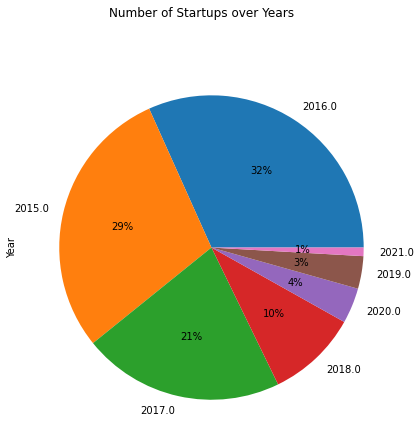

In [ ]:
time_df = startup_data
time_df["Year"] = (pd.to_datetime(time_df['Date']).dt.year)
temp = time_df['Year'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per year in decreasing order(Top 10)\n",temp)
year_month = time_df['Year'].value_counts()
time_df['Year'].value_counts().plot(kind='pie', figsize=(11,7), title='Number of Startups over Years', subplots=True, autopct='%.f%%')
plt.show()

We can see that 2018 - 2020 had a huge decline in number of startups funded dropping from 687 in '17 to 310 in '18... and another drop in '19 to only 111 fundings

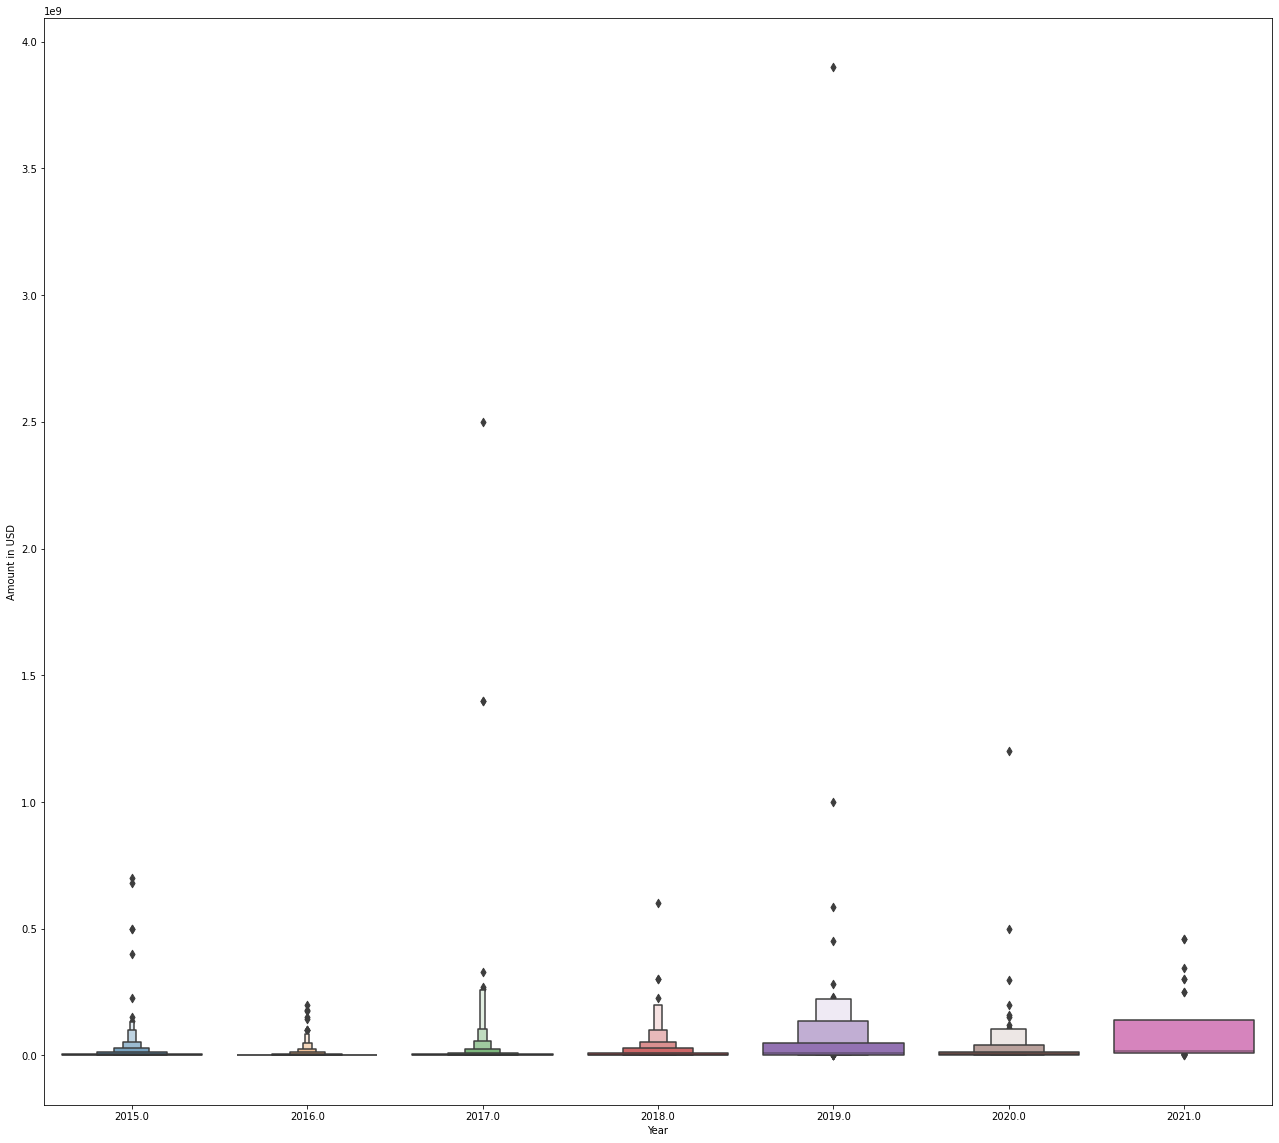

In [ ]:
plt.figure(figsize=(22,20))
sns.boxenplot(data=startup_data, x='Year', y='Amount in USD')
plt.show()

In [ ]:
startup_data[startup_data["Amount in USD"]==startup_data["Amount in USD"].max()]

,Date,Startup Name,Industry,Sub-vertical,Location,Investors,Investment Type,Amount in USD,Website URL,Year
187,2019-08-27,Rapido Bike Taxi,Transport,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09,https://www.rapido.bike/,2019.0


# Industry Funding

**Industry values were missing for year 2015 startups**

Consumer Internet    958
nan                  936
Technology           506
E-Commerce           322
Finance               94
Healthcare            75
Education             59
Food & Beverage       37
Logistics             32
Transport             13
Real Estate            8
Others                 6
Hospitality            5
Automobile             4
AgriTech               4
Name: Industry, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


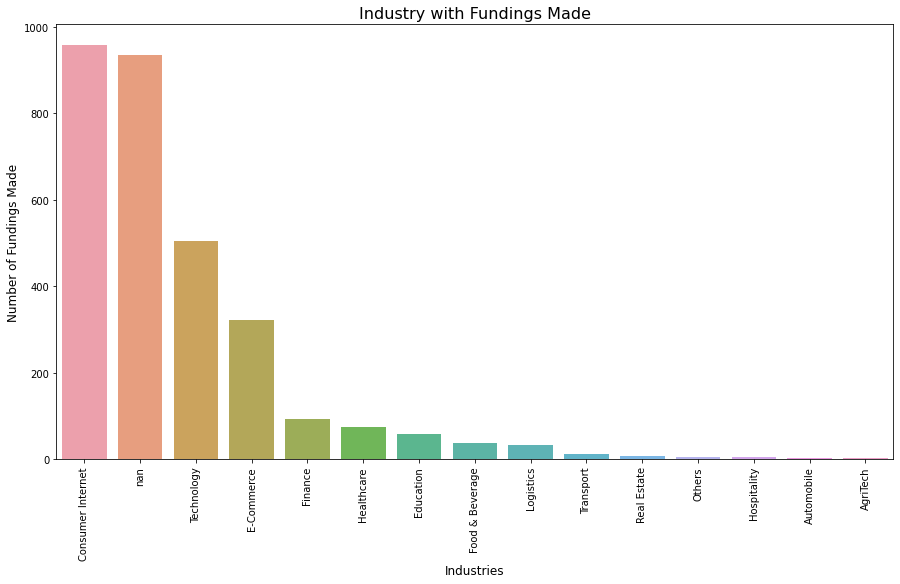

In [ ]:
industry = startup_data['Industry'].value_counts().head(15)
print(industry)

plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel("Industries", fontsize=12)
plt.ylabel("Number of Fundings Made", fontsize=12)
plt.title("Industry with Fundings Made", fontsize=16)
plt.show()

In [ ]:
startup_data[startup_data.Industry=="Others"]

,Date,Startup Name,Industry,Sub-vertical,Location,Investors,Investment Type,Amount in USD,Website URL,Year
824,2017-07-26,Creator’s Gurukul,Others,Co-Working Space Provider,New Delhi,Yuvraj Singh,Seed Funding,0,http://www.creatorsgurukul.com/,2017.0
1434,2016-10-17,Rentalpha,Others,equipment rental and leasing company,Mumbai,Bravia Capital,Private Equity,16000000.0,http://www.rentalpha.com/,2016.0
1625,2016-08-08,Wefly Indoor Skydiving,Others,Indoor Skydiving Sports Provider,Mumbai,Swastika Company Ltd.,Seed Funding,40000.0,http://www.weflyindia.co.in/,2016.0
1630,2016-08-04,lehlehsports,Others,Sports Arena discovery,New Delhi,Anglian Omega Network,Seed Funding,0,NaN,2016.0
1750,2016-06-24,KabadiExpress,Others,Free Door Step Scrap Pickup Service,New Delhi,Undisclosed investor,Seed Funding,148000.0,NaN,2016.0
1751,2016-06-24,LEAP India,Others,Supply Chain Equipment & Services provider,Mumbai,Mayfield Ventures,Private Equity,3000000.0,http://www.leap-india.com/,2016.0


In [ ]:
startup_data[startup_data.Industry=="Consumer Internet"]

,Date,Startup Name,Industry,Sub-vertical,Location,Investors,Investment Type,Amount in USD,Website URL,Year
294,2018-09-11,Pharmeasy,Consumer Internet,Online Marketplace For Pharmaceutical Products,Mumbai,InnoVen Capital,Debt Funding,5500000.0,https://pharmeasy.in,2018.0
298,2018-09-06,Dream11,Consumer Internet,Online Gaming Platform,Mumbai,"Tencent, Kalaari Capital and Private equity fi...",Private Equity,100000000.0,https://www.dream11.com,2018.0
299,2018-09-05,Nykaa,Consumer Internet,Online Marketplace For Multi-brand Beauty Cosm...,Mumbai,Lighthouse,Private Equity,157200000.0,https://www.nykaa.com,2018.0
302,2018-09-04,HappyGoEasy,Consumer Internet,Online Travel Agecy,Gurugram,"Korea Investment Partners (KIP), Samsung and C...",Private Equity,0.0,https://www.happyeasygo.com,2018.0
303,2018-09-03,Daily hunt,Consumer Internet,News and ebooks Mobile App,Bengaluru,Falcon Edge,Private Equity,6390000.0,http://www.dailyhunt.in,2018.0
...,...,...,...,...,...,...,...,...,...,...
2257,2016-01-07,Infurnia,Consumer Internet,Online Furniture Customization platform,Bangalore,Idein Ventures,Seed Funding,160000.0,http://infurnia.com/,2016.0
2262,2016-01-06,Zebpay,Consumer Internet,Bitcoin Buying & Selling Mobile App,Ahmedabad,"Arjun Handa, Amit Jindal, Nagendra Chaudhary",Private Equity,1000000.0,https://www.zebpay.com/,2016.0
2269,2016-01-05,360Ride,Consumer Internet,Ride Sharing platform,Bangalore,nan,Seed Funding,150000.0,NaN,2016.0
2270,2016-01-05,Alef\nMobitech,Consumer Internet,Cloud Mobility Solutions,Mumbai,Tata Capital Innovation Fund,Private Equity,5000000.0,http://www.alefmobitech.com/,2016.0


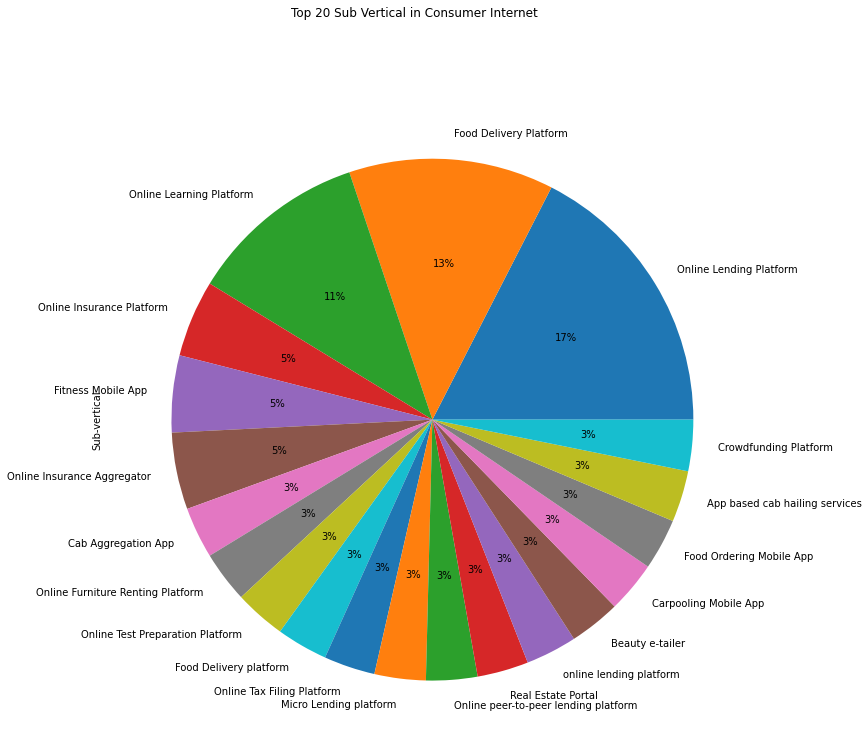

In [ ]:
sub = startup_data[startup_data["Industry"] == "Consumer Internet"]
sub['Sub-vertical'].value_counts()[:20].plot(kind='pie', figsize=(20,12), title='Top 20 Sub Vertical in Consumer Internet', subplots=True, autopct='%.f%%')
plt.show()

# Startups Most Funded and Startups number of times funded

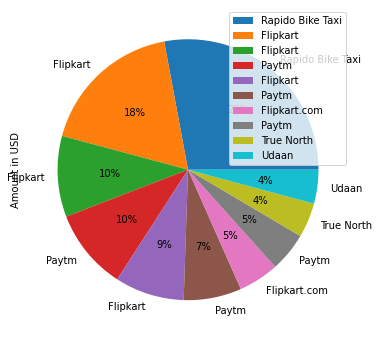

Startup Name,Rapido Bike Taxi,Flipkart,Flipkart,Paytm,Flipkart,Paytm,Flipkart.com,Paytm,True North,Udaan
Amount in USD,3.900000e+09,2.500000e+09,1.400000e+09,1.400000e+09,1.200000e+09,1.000000e+09,700000000.0,680000000.0,600000000.0,585000000.0


In [ ]:
temp_df = startup_data.sort_values('Amount in USD', ascending=False, )
temp_df = temp_df[['Startup Name', 'Amount in USD']][:10].set_index('Startup Name', drop=True, )

temp_df.plot(kind='pie', subplots=True, figsize=(12,6), autopct='%.f%%')
plt.show()

temp_df.T

In [ ]:
print("Total amount FlipKart - ", startup_data.loc[startup_data['Startup Name'] == 'Flipkart', 'Amount in USD'].sum())
print("Total amount Paytm - ", startup_data.loc[startup_data['Startup Name'] == 'Paytm', 'Amount in USD'].sum())

Total amount FlipKart -  5259700000.0
Total amount Paytm -  3148950000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


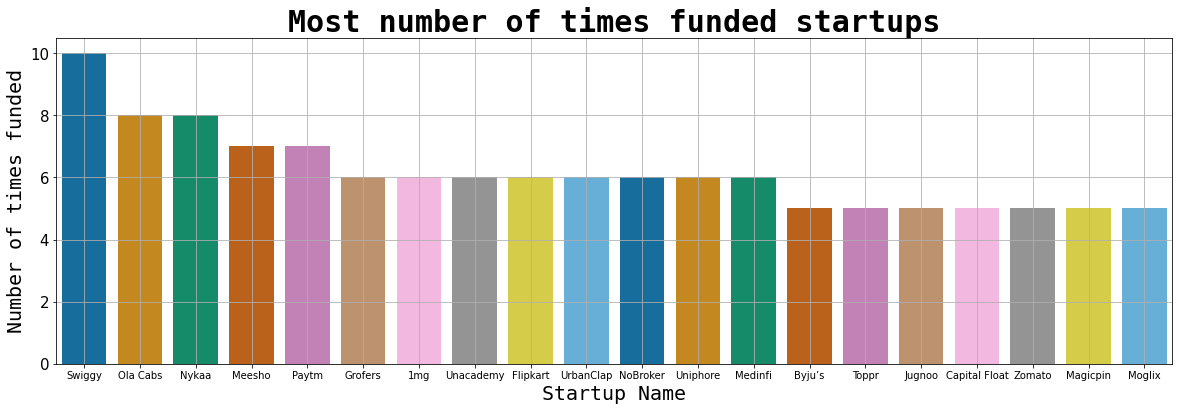

In [ ]:
most_funded = startup_data['Startup Name'].value_counts().head(20)
plt.figure(figsize = (20, 6))
sns.barplot(most_funded.index, most_funded.values, palette = 'colorblind')
plt.title('Most number of times funded startups', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Startup Name', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of times funded', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(axis = 'x', labelsize = 10)
plt.tick_params(axis = 'y', labelsize = 15)
plt.grid()
plt.show()

In [ ]:
print("Total amount Swiggy - ", startup_data.loc[startup_data['Startup Name'] == 'Swiggy', 'Amount in USD'].sum())
print("Total amount Ola Cabs - ", startup_data.loc[startup_data['Startup Name'] == 'Ola Cabs', 'Amount in USD'].sum())
#656 mil

Total amount Swiggy -  656500000.0
Total amount Ola Cabs -  669700000.0


# Funding relative to location

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


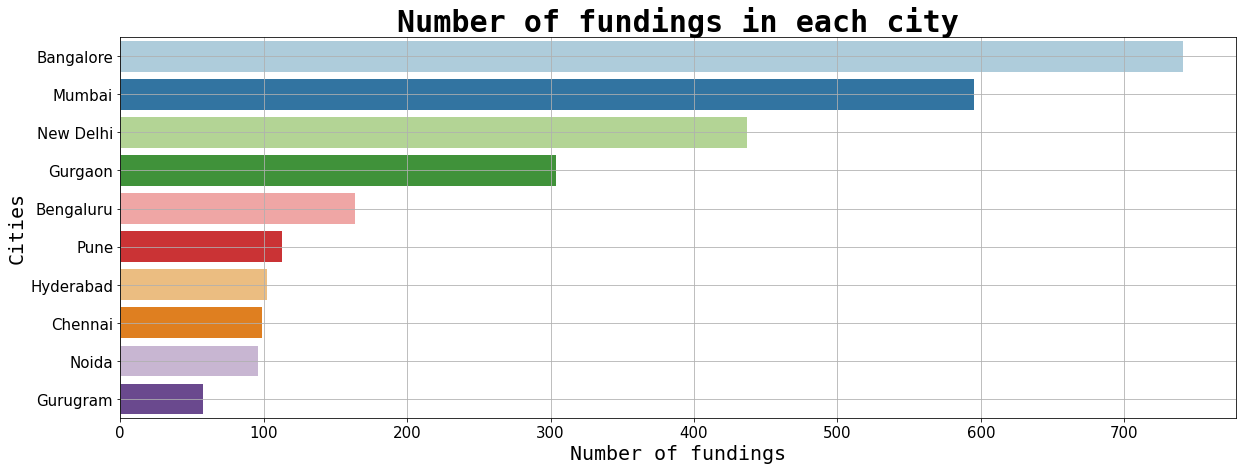

In [ ]:
cities = startup_data['Location'].value_counts().head(10)
plt.figure(figsize = (20, 7))
sns.barplot(cities.values, cities.index, palette = 'Paired')
plt.title('Number of fundings in each city', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Number of fundings', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Cities', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.grid()
plt.show()

# Investors

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


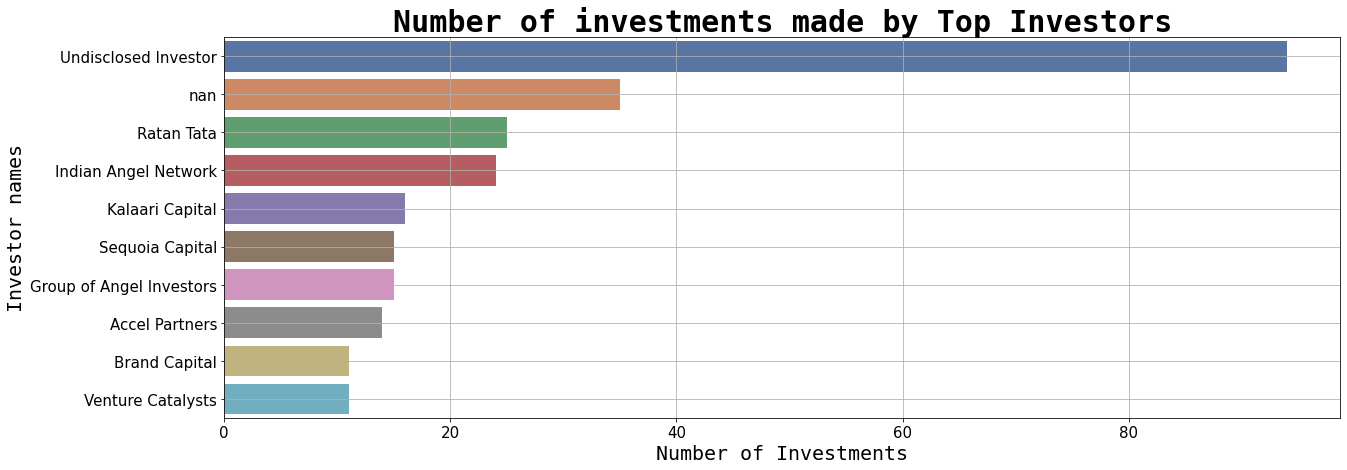

In [ ]:
investors = startup_data['Investors'].value_counts().head(10)
plt.figure(figsize = (20, 7))
sns.barplot(investors.values, investors.index, palette = 'deep')
plt.title('Number of investments made by Top Investors', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Number of Investments', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Investor names', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.grid()
plt.show()

# Investment Type

In [ ]:
startup_data['Investment Type'].value_counts().head(10)

Seed Funding            1405
Private Equity          1365
Seed/ Angel Funding       60
Seed / Angel Funding      47
Series A                  45
Series B                  31
Series C                  25
Seed                      25
Debt Funding              25
Seed/Angel Funding        23
Name: Investment Type, dtype: int64

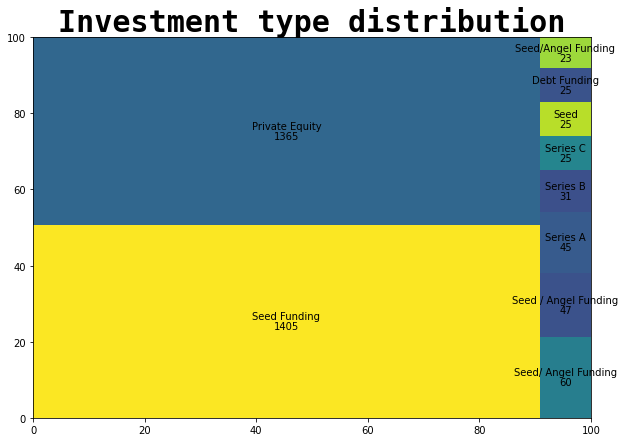

In [ ]:
!pip install squarify
investment_type = startup_data['Investment Type'].value_counts().head(10)
import squarify
plt.figure(figsize = (10, 7))
squarify.plot(sizes = investment_type.values, label = investment_type.index, value = investment_type.values)
plt.title('Investment type distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.show()

The major types of investments are Private Equity and Seed Funding which account for more than 90% of fundings.

Other types of fundings are Debt funding, Seed/Angel funding, Series A, Series B, Series C but they are very rare.